### 1. In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 

#### Machine Learning is learning about the world from the data. Machine learning uses statistical and computer science models to draw valid information from the data. Data is captured, extracted and stored using proper methods. When to use machine learning is based on many different factors such as new opportnity, business needs, benifit in terms of cost, revenue involved in implementing, etc.

#### Machine learning is used to draw casual insights, predict future events and understand the patterns in the data. It is benefical to intoduce ML to the business only when we have properly collected, cleaned data. If input data is not good enough then models throw garbage out as garbage is sent in. Also, this models are applicable only when we have a clear scope on what to expect out of the data like probability of machine break downs, probaility of customer returning back. Before applying ML the organization should look and run some tests on the historic data and then need to decidie if it is worth investement or not. 

#### When there is no proper historic data, abscence or lack of business knowledge and failure to do indepth analysis, wide range of scope then ML cannot be implemented as all these factors can lead to incorrect results. In these scenarios data should be cleaned properly, work on the data to get some insights then test on real time time. Its better to keep adding fewer features at a time then test and implement them.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import perf_counter
from sklearn import preprocessing

In [2]:
pd.set_option('max_columns', 60)
pd.set_option('max_rows',100)

In [58]:
df=pd.read_csv("loans_full_schema.csv")
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,0,NaN,2008,5,44,13,199195,77963,0,1,NaN,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,debt_consolidation,individual,10000,36,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,2,6.0,2004,0,18,11,346402,95421,0,0,NaN,0,0,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2,0,0,debt_consolidation,joint,30000,36,23.88,1175.10,E,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,0,NaN,1999,1,38,15,294475,27641,0,0,NaN,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


### 2. Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques.

1.Cleaning up null values
2Data cleaning (dashes, odd characters, etc)
    Handle missing data
    Remove extreme outliers
3.One-Hot encoding
4.Convert Categorical values to numerical (sometimes that is the same as 3)
5.Standardization/Normalization
6.Deal with multicollinearity (can be caused by 3)

In [4]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [5]:
df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [6]:
df.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,2285.000000,10000.0000,10000.000000,10000.000000,10000.000000,8729.000000,10000.000000,9682.0,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,11.40440,1.836062e+05,51049.063100,0.013800,0.167100,46.112473,0.0001,184.334000,2.663600,4.376100,7.340703,11.379600,0.0,0.0001,3.595300,27357.410300,13.030000,8.095000,5.230500,1.383100,94.648990,0.043300,0.123800,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,5.86828,1.876327e+05,53636.731172,0.126535,0.687768,21.748021,0.0100,2206.389859,2.935387,3.158583,5.981590,5.859705,0.0,0.0100,2.434689,26570.164081,7.874713,4.906606,3.327623,1.717274,9.155059,0.593852,0.337172,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000,2.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,14.300000,0.000000,0.000000,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,7.00000,5.159375e+04,19185.500000,0.000000,0.000000,29.000000,0.0000,0.000000,1.000000,2.000000,2.000000,7.000000,0.0,0.0000,2.000000,10000.000000,7.000000,5.000000,3.000000,0.000000,92.600000,0.000000,0.000000,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,10.00000,1.146670e+05,36927.000000,0.000000,0.000000,47.000000,0.0000,0.000000,2.000000,4.000000,6.000000,10.000000,0.0,0.0000,3.000000,19500.000000,11.000000,7.000000,5.000000,1.000000,100.000000,0.000000,0.000000,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,14.00000,2.675500e+05,65421.000000,0.000000,0.000000,63.000000,0.0000,0.000000,3.000000,6.000000,11.000000,14.000000,0.0,0.0000,5.000000,36100.000000,17.000000,10.000000,7.000000,2.000000,100.000000,0.000000,0.000000,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,51.00000,3.386034e+06,942456.000000,3.000000,52.

### Pre-processing Data:


### 2. Check for duplicates and missing values:

In [7]:
df[df.duplicated(subset=None, keep=False)]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees


#### None of the duplicate records has been found.

### 2.1. Checking for nulls:

In [8]:
df.isnull().values.any() 

True

In [9]:
df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

#### 10 columns are identified with missing data

#### 2.1.1.Working on "emp_title" column for nulls:

In [10]:
df[df['emp_title'].isnull()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
5,NaN,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
14,NaN,NaN,FL,MORTGAGE,17000.0,Verified,33.98,NaN,NaN,NaN,1,6.0,2006,0,22,10,74042,26483,0,1,6.0,0,0,3,4,14.0,10,0.0,0,2,3600,17,7,2,1,90.9,0,1,debt_consolidation,individual,3000,36,19.03,110.02,D,D3,Jan-2018,Current,whole,Cash,2744.21,454.36,255.79,198.57,0.0
16,NaN,NaN,NV,MORTGAGE,60000.0,Not Verified,31.22,NaN,NaN,NaN,0,77.0,2003,4,21,9,375092,93016,0,0,NaN,0,0,3,8,2.0,9,0.0,0,2,15800,7,5,3,2,95.2,0,0,credit_card,individual,12000,60,19.03,311.49,D,D3,Jan-2018,Current,whole,Cash,11374.52,1532.08,625.48,906.60,0.0
23,NaN,NaN,TX,MORTGAGE,40280.0,Verified,7.27,NaN,NaN,NaN,0,NaN,1997,1,10,4,188450,6103,0,0,NaN,0,0,1,0,9.0,4,0.0,0,1,7500,7,2,1,1,90.0,0,0,home_improvement,individual,3500,36,6.71,107.61,A,A3,Mar-2018,Current,whole,Cash,3323.42,223.71,176.58,47.13,0.0
40,NaN,NaN,MI,MORTGAGE,19000.0,Not Verified,24.79,43000.0,Not Verified,17.15,0,NaN,2004,0,12,6,23234,12435,0,1,NaN,0,154,0,2,13.0,6,0.0,0,2,3000,8,5,4,1,100.0,0,1,other,joint,10000,60,18.06,254.27,D,D2,Jan-2018,Current,whole,Cash,9465.30,1261.32,534.70,726.62,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,NaN,NaN,MO,OWN,45000.0,Source Verified,24.99,NaN,NaN,NaN,2,9.0,2001,1,18,9,94367,26306,0,0,9.0,0,0,2,5,9.0,8,0.0,0,2,49900,12,7,2,0,88.9,0,0,other,individual,10000,36,10.90,326.92,B,B4,Mar-2018,Current,whole,Cash,9525.68,647.78,474.32,173.46,0.0
9932,NaN,NaN,NC,RENT,45000.0,Not Verified,14.93,NaN,NaN,NaN,0,NaN,1993,0,7,1,23000,22860,0,0,NaN,0,0,0,0,21.0,1,0.0,0,1,23000,2,1,1,4,100.0,0,0,credit_card,individual,20000,36,9.43,640.01,B,B1,Mar-2018,Current,whole,Cash,18540.06,1899.07,1459.94,439.13,0.0
9941,NaN,NaN,GA,MORTGAGE,25000.0,Verified,28.42,NaN,NaN,NaN,0,NaN,2006,1,13,3,129449,5803,0,0,NaN,0,0,1,1,2.0,3,0.0,0,0,0,2,1,1,3,100.0,0,0,other,individual,3025,36,9.93,97.51,B,B2,Feb-2018,Current,whole,Cash,2731.47,388.37,293.53,94.84,0.0
9975,NaN,NaN,MD,MORTGAGE,95000.0,Source Verified,10.66,NaN,NaN,NaN,0,NaN,1996,0,10,8,54188,36484,0,1,NaN,0,0,2,5,16.0,8,0.0,0,4,22200,7,6,4,0,100.0,0,1,car,individual,20000,36,14.07,684.24,C,C3,Mar-2018,Current,whole,Cash,18634.90,2037.09,1365.10,671.99,0.0


#### Since much cannot be drawn from the data and not much significant in loan determination process, the missing values have been assigned with unknown string value.

In [11]:
df['emp_title']=df['emp_title'].fillna('unknown')

In [12]:
df[df['emp_title']=='unknown']

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
5,unknown,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
14,unknown,NaN,FL,MORTGAGE,17000.0,Verified,33.98,NaN,NaN,NaN,1,6.0,2006,0,22,10,74042,26483,0,1,6.0,0,0,3,4,14.0,10,0.0,0,2,3600,17,7,2,1,90.9,0,1,debt_consolidation,individual,3000,36,19.03,110.02,D,D3,Jan-2018,Current,whole,Cash,2744.21,454.36,255.79,198.57,0.0
16,unknown,NaN,NV,MORTGAGE,60000.0,Not Verified,31.22,NaN,NaN,NaN,0,77.0,2003,4,21,9,375092,93016,0,0,NaN,0,0,3,8,2.0,9,0.0,0,2,15800,7,5,3,2,95.2,0,0,credit_card,individual,12000,60,19.03,311.49,D,D3,Jan-2018,Current,whole,Cash,11374.52,1532.08,625.48,906.60,0.0
23,unknown,NaN,TX,MORTGAGE,40280.0,Verified,7.27,NaN,NaN,NaN,0,NaN,1997,1,10,4,188450,6103,0,0,NaN,0,0,1,0,9.0,4,0.0,0,1,7500,7,2,1,1,90.0,0,0,home_improvement,individual,3500,36,6.71,107.61,A,A3,Mar-2018,Current,whole,Cash,3323.42,223.71,176.58,47.13,0.0
40,unknown,NaN,MI,MORTGAGE,19000.0,Not Verified,24.79,43000.0,Not Verified,17.15,0,NaN,2004,0,12,6,23234,12435,0,1,NaN,0,154,0,2,13.0,6,0.0,0,2,3000,8,5,4,1,100.0,0,1,other,joint,10000,60,18.06,254.27,D,D2,Jan-2018,Current,whole,Cash,9465.30,1261.32,534.70,726.62,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,unknown,NaN,MO,OWN,45000.0,Source Verified,24.99,NaN,NaN,NaN,2,9.0,2001,1,18,9,94367,26306,0,0,9.0,0,0,2,5,9.0,8,0.0,0,2,49900,12,7,2,0,88.9,0,0,other,individual,10000,36,10.90,326.92,B,B4,Mar-2018,Current,whole,Cash,9525.68,647.78,474.32,173.46,0.0
9932,unknown,NaN,NC,RENT,45000.0,Not Verified,14.93,NaN,NaN,NaN,0,NaN,1993,0,7,1,23000,22860,0,0,NaN,0,0,0,0,21.0,1,0.0,0,1,23000,2,1,1,4,100.0,0,0,credit_card,individual,20000,36,9.43,640.01,B,B1,Mar-2018,Current,whole,Cash,18540.06,1899.07,1459.94,439.13,0.0
9941,unknown,NaN,GA,MORTGAGE,25000.0,Verified,28.42,NaN,NaN,NaN,0,NaN,2006,1,13,3,129449,5803,0,0,NaN,0,0,1,1,2.0,3,0.0,0,0,0,2,1,1,3,100.0,0,0,other,individual,3025,36,9.93,97.51,B,B2,Feb-2018,Current,whole,Cash,2731.47,388.37,293.53,94.84,0.0
9975,unknown,NaN,MD,MORTGAGE,95000.0,Source Verified,10.66,NaN,NaN,NaN,0,NaN,1996,0,10,8,54188,36484,0,1,NaN,0,0,2,5,16.0,8,0.0,0,4,22200,7,6,4,0,100.0,0,1,car,individual,20000,36,14.07,684.24,C,C3,Mar-2018,Current,whole,Cash,18634.90,2037.09,1365.10,671.99,0.0


#### 2.1.2.Working on "emp_length"  column for nulls:

In [13]:
df[df['emp_length'].isnull()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
5,unknown,NaN,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
14,unknown,NaN,FL,MORTGAGE,17000.0,Verified,33.98,NaN,NaN,NaN,1,6.0,2006,0,22,10,74042,26483,0,1,6.0,0,0,3,4,14.0,10,0.0,0,2,3600,17,7,2,1,90.9,0,1,debt_consolidation,individual,3000,36,19.03,110.02,D,D3,Jan-2018,Current,whole,Cash,2744.21,454.36,255.79,198.57,0.0
16,unknown,NaN,NV,MORTGAGE,60000.0,Not Verified,31.22,NaN,NaN,NaN,0,77.0,2003,4,21,9,375092,93016,0,0,NaN,0,0,3,8,2.0,9,0.0,0,2,15800,7,5,3,2,95.2,0,0,credit_card,individual,12000,60,19.03,311.49,D,D3,Jan-2018,Current,whole,Cash,11374.52,1532.08,625.48,906.60,0.0
23,unknown,NaN,TX,MORTGAGE,40280.0,Verified,7.27,NaN,NaN,NaN,0,NaN,1997,1,10,4,188450,6103,0,0,NaN,0,0,1,0,9.0,4,0.0,0,1,7500,7,2,1,1,90.0,0,0,home_improvement,individual,3500,36,6.71,107.61,A,A3,Mar-2018,Current,whole,Cash,3323.42,223.71,176.58,47.13,0.0
40,unknown,NaN,MI,MORTGAGE,19000.0,Not Verified,24.79,43000.0,Not Verified,17.15,0,NaN,2004,0,12,6,23234,12435,0,1,NaN,0,154,0,2,13.0,6,0.0,0,2,3000,8,5,4,1,100.0,0,1,other,joint,10000,60,18.06,254.27,D,D2,Jan-2018,Current,whole,Cash,9465.30,1261.32,534.70,726.62,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,unknown,NaN,MO,OWN,45000.0,Source Verified,24.99,NaN,NaN,NaN,2,9.0,2001,1,18,9,94367,26306,0,0,9.0,0,0,2,5,9.0,8,0.0,0,2,49900,12,7,2,0,88.9,0,0,other,individual,10000,36,10.90,326.92,B,B4,Mar-2018,Current,whole,Cash,9525.68,647.78,474.32,173.46,0.0
9932,unknown,NaN,NC,RENT,45000.0,Not Verified,14.93,NaN,NaN,NaN,0,NaN,1993,0,7,1,23000,22860,0,0,NaN,0,0,0,0,21.0,1,0.0,0,1,23000,2,1,1,4,100.0,0,0,credit_card,individual,20000,36,9.43,640.01,B,B1,Mar-2018,Current,whole,Cash,18540.06,1899.07,1459.94,439.13,0.0
9941,unknown,NaN,GA,MORTGAGE,25000.0,Verified,28.42,NaN,NaN,NaN,0,NaN,2006,1,13,3,129449,5803,0,0,NaN,0,0,1,1,2.0,3,0.0,0,0,0,2,1,1,3,100.0,0,0,other,individual,3025,36,9.93,97.51,B,B2,Feb-2018,Current,whole,Cash,2731.47,388.37,293.53,94.84,0.0
9975,unknown,NaN,MD,MORTGAGE,95000.0,Source Verified,10.66,NaN,NaN,NaN,0,NaN,1996,0,10,8,54188,36484,0,1,NaN,0,0,2,5,16.0,8,0.0,0,4,22200,7,6,4,0,100.0,0,1,car,individual,20000,36,14.07,684.24,C,C3,Mar-2018,Current,whole,Cash,18634.90,2037.09,1365.10,671.99,0.0


In [14]:
df[df['emp_length'].isnull()]['earliest_credit_line'].unique()

array([1990, 2006, 2003, 1997, 2004, 1984, 2009, 1998, 2010, 2000, 2002,
       2007, 1992, 2014, 1982, 2005, 1976, 2011, 1996, 2008, 1985, 1974,
       1993, 1994, 1995, 2001, 2012, 1983, 1988, 1999, 1972, 1987, 1977,
       1991, 1979, 1981, 1971, 1989, 1978, 2013, 1986, 1973, 1980, 1975,
       1963, 1968, 1970, 1965, 1964, 1969, 1967])

#### Three options were identified to fill null. 
#### 1.One is to fill them with 10 as by default any applicant who is more than 10 years are considered only 10. 
#### 2. Other option is to take median which is 6. 
#### 3. Calculate emp_length based on the "earliest_credit_line" column.
#### After care ful observation of the data, considertation is given to replacing by 10. 

In [15]:
df['emp_length']=df['emp_length'].fillna(10)

(array([ 690.,  685.,  967.,  862.,  611.,  645.,  404.,  368.,  307.,
        4461.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

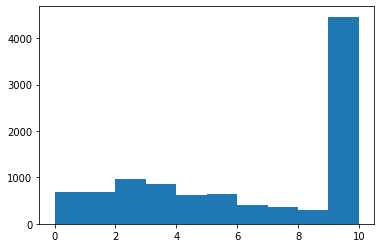

In [16]:
plt.hist(df['emp_length'])

#### 2.3.Working on debt_to_income column for nulls:

In [17]:
df[df['debt_to_income'].isnull()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
154,unknown,10.0,AZ,RENT,0.0,Not Verified,NaN,167250.0,Not Verified,14.92,2,18.0,2007,10,15,9,43354,34997,0,0,NaN,0,609,1,4,3.0,9,0.0,0,4,6200,8,8,5,0,86.7,0,0,debt_consolidation,joint,20000,60,17.09,498.02,D,D1,Feb-2018,Current,whole,Cash,19128.86,1944.610000,871.14,1073.47,0.0
927,unknown,10.0,IN,RENT,0.0,Not Verified,NaN,28000.0,Not Verified,5.61,0,28.0,2001,5,6,5,10100,4225,0,0,NaN,0,0,0,2,3.0,5,0.0,0,1,5600,6,5,2,0,83.3,0,0,credit_card,joint,5200,36,10.41,168.80,B,B3,Mar-2018,Current,whole,Cash,4825.70,525.950000,374.30,151.65,0.0
1255,unknown,10.0,OK,MORTGAGE,0.0,Not Verified,NaN,150000.0,Not Verified,13.81,1,13.0,2003,1,20,9,41852,19489,0,0,13.0,0,0,3,2,8.0,9,0.0,0,1,600,16,6,2,0,90.0,0,0,home_improvement,joint,24000,60,17.47,602.55,D,D1,Mar-2018,Current,fractional,Cash,23229.44,1761.060000,770.56,990.50,0.0
1330,unknown,10.0,WA,MORTGAGE,0.0,Not Verified,NaN,84000.0,Not Verified,17.43,0,53.0,2002,1,22,11,220540,25377,0,0,67.0,0,0,3,7,1.0,11,0.0,0,3,19000,12,7,4,3,95.5,0,0,debt_consolidation,joint,15000,36,7.35,465.57,A,A4,Feb-2018,Current,whole,Cash,13872.03,1390.590000,1127.97,262.62,0.0
1653,unknown,10.0,IL,RENT,0.0,Not Verified,NaN,74000.0,Not Verified,30.63,1,14.0,2007,2,15,5,51710,42693,0,0,44.0,0,976,2,3,2.0,5,0.0,0,0,800,5,3,1,0,60.0,0,0,credit_card,joint,30400,36,20.39,1135.83,D,D4,Mar-2018,Current,whole,Cash,28510.40,3373.050000,1889.60,1483.45,0.0
1718,unknown,10.0,TX,MORTGAGE,0.0,Verified,NaN,128000.0,NaN,25.95,0,67.0,1996,1,19,10,296223,70537,0,0,NaN,0,0,5,3,8.0,10,0.0,0,1,20000,10,3,3,1,77.8,0,0,debt_consolidation,joint,27800,36,9.43,889.61,B,B1,Feb-2018,Current,whole,DirectPay,25764.48,2661.270000,2035.52,625.75,0.0
1845,unknown,10.0,TX,OWN,0.0,Not Verified,NaN,134000.0,Not Verified,20.52,0,NaN,2011,1,16,11,44819,29788,0,0,NaN,0,185,1,5,0.0,11,0.0,0,3,12500,13,10,8,0,100.0,0,0,debt_consolidation,joint,32000,60,20.39,854.77,D,D4,Mar-2018,Current,whole,Cash,31050.95,2528.060000,949.05,1579.01,0.0
2106,unknown,10.0,ID,RENT,1.0,Verified,NaN,74001.0,NaN,20.33,0,NaN,2006,0,18,12,73297,60814,0,0,NaN,0,0,1,10,15.0,12,0.0,0,5,14000,14,11,8,0,100.0,0,0,credit_card,joint,10000,36,7.97,313.23,A,A5,Jan-2018,Current,whole,DirectPay,8749.43,1561.720000,1250.57,311.15,0.0
2546,unknown,10.0,TX,RENT,0.0,Not Verified,NaN,88265.0,Not Verified,11.91,0,NaN,2013,0,5,5,22500,11150,0,0,NaN,0,0,0,1,NaN,5,0.0,0,2,22500,5,5,2,0,100.0,0,0,credit_card,joint,18000,36,13.58,611.54,C,C2,Mar-2018,Current,whole,Cash,16741.91,1841.040000,1258.09,582.95,0.0
2556,unknown,10.0,CA,RENT,0.0,Not Verified,NaN,77000.0,Not Verified,13.73,0,NaN,2006,1,10,6,32545,9295,0,0,NaN,0,1676,1,3,2.0,6,0.0,0,1,3600,7,5,2,0,100.0,0,0,debt_consolidation,joint,18000,36,15.05,624.42,C,C4,Feb-2018,Current,fractional,Cash,16375.07,2467.580000,1624.93,842.65,0.0


#### Since less than 2% of the data is missing replacing the debt_to_income with zeros.

In [18]:
df['debt_to_income']=df['debt_to_income'].fillna(0)

##### 2.1.4.Checking nulls for annual_income_joint column:

In [19]:
df[df['annual_income_joint'].isnull()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
5,unknown,10.0,KY,OWN,34000.0,Not Verified,6.46,NaN,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,da coordinator,1.0,WA,RENT,40000.0,Not Verified,12.07,NaN,NaN,NaN,0,62.0,2008,0,18,13,50932,46132,0,0,62.0,0,0,8,3,16.0,13,0.0,0,3,11800,5,5,3,0,88.9,0,0,credit_card,individual,4800,36,10.41,155.81,B,B3,Mar-2018,Current,fractional,Cash,1854.81,3064.65,2945.19,119.46,0.0
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,0,NaN,2008,5,44,13,199195,77963,0,1,NaN,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,debt_consolidation,individual,10000,36,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,0,NaN,1999,1,38,15,294475,27641,0,0,NaN,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


#### "annual_income_joint" column is very important to capture as its tells total earnings of the family. Here if this column is missing implies that the family has only one earning or it could be missing. For sake of cleaning up the data nulls are replaced with annual_income column value. 
#### If considered single earning then annual_income will become the anuual_joint_income.

#### In spite of 85% of missing data we choose to replace this null with annual_income value as this data is important.

In [20]:
df.loc[df['annual_income_joint'].isnull(),"annual_income_joint"]=df.loc[df['annual_income_joint'].isnull(),"annual_income"]

##### 2.1.5.Checking nulls for verification_income_joint column:

In [21]:
df[df['verification_income_joint'].isnull()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,90000.0,NaN,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,NaN,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,40000.0,NaN,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,NaN,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
5,unknown,10.0,KY,OWN,34000.0,Not Verified,6.46,34000.0,NaN,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,da coordinator,1.0,WA,RENT,40000.0,Not Verified,12.07,40000.0,NaN,NaN,0,62.0,2008,0,18,13,50932,46132,0,0,62.0,0,0,8,3,16.0,13,0.0,0,3,11800,5,5,3,0,88.9,0,0,credit_card,individual,4800,36,10.41,155.81,B,B3,Mar-2018,Current,fractional,Cash,1854.81,3064.65,2945.19,119.46,0.0
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,108000.0,NaN,NaN,0,NaN,2008,5,44,13,199195,77963,0,1,NaN,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,121000.0,NaN,NaN,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,debt_consolidation,individual,10000,36,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,80000.0,NaN,NaN,0,NaN,1999,1,38,15,294475,27641,0,0,NaN,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


#### Check for types of data in verification_income_joint column:

In [22]:
df.groupby(['verification_income_joint'])['verification_income_joint'].count()

verification_income_joint
Not Verified       611
Source Verified    499
Verified           345
Name: verification_income_joint, dtype: int64

#### 85% of data has nulls. Rest 15% that has verified data of 25% of remaining. This data does not provide additional value hence wanted to drop column.

In [23]:
df.drop('verification_income_joint', axis=1,inplace=True)

##### 2.1.6.Checking nulls for debt_to_income_joint column:

In [24]:
df[df['debt_to_income_joint'].isnull()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,90000.0,NaN,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0.0,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,NaN,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,40000.0,NaN,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0.0,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,NaN,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
5,unknown,10.0,KY,OWN,34000.0,Not Verified,6.46,34000.0,NaN,1,3.0,1990,6,32,12,42100,3898,0,0,60.0,0,0,0,2,5.0,12,0.0,0,1,27200,27,12,5,3,78.1,0,0,other,individual,5000,36,6.72,153.75,A,A3,Jan-2018,Current,whole,Cash,4256.71,873.13,743.29,129.84,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,da coordinator,1.0,WA,RENT,40000.0,Not Verified,12.07,40000.0,NaN,0,62.0,2008,0,18,13,50932,46132,0,0,62.0,0,0,8,3,16.0,13,0.0,0,3,11800,5,5,3,0,88.9,0,0,credit_card,individual,4800,36,10.41,155.81,B,B3,Mar-2018,Current,fractional,Cash,1854.81,3064.65,2945.19,119.46,0.0
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,108000.0,NaN,0,NaN,2008,5,44,13,199195,77963,0,1,NaN,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,121000.0,NaN,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,3,0,1.0,15,0.0,0,5,28200,18,11,8,2,82.1,0,0,debt_consolidation,individual,10000,36,19.03,366.72,D,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,80000.0,NaN,0,NaN,1999,1,38,15,294475,27641,0,0,NaN,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


#### debt_to_income_joint column need to be droped as we have only 15 of valid data.

In [25]:
df.drop('debt_to_income_joint', axis=1,inplace=True)

#### 2.1.7. Checking for nulls in months_since_last_delinq column:

In [26]:
df[df['months_since_last_delinq'].isnull()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,0,NaN,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,0,NaN,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,0,NaN,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,0,NaN,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,C,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,30000.0,0,NaN,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,A,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,program director,5.0,NY,RENT,70000.0,Not Verified,15.31,70000.0,0,NaN,1991,0,6,3,32000,29762,0,0,NaN,0,0,0,1,NaN,3,0.0,0,1,32000,4,3,1,0,100.0,0,0,debt_consolidation,individual,23000,60,9.93,487.90,B,B2,Jan-2018,Current,whole,DirectPay,21487.30,2426.81,1512.70,914.11,0.0
9993,service advisor,0.0,NC,MORTGAGE,20000.0,Source Verified,23.23,20000.0,0,NaN,2013,2,8,7,33238,19706,0,0,NaN,0,0,5,1,4.0,7,0.0,0,0,3000,2,2,0,0,100.0,0,0,house,individual,5000,36,7.97,156.62,A,A5,Jan-2018,Current,whole,Cash,4374.69,778.67,625.31,153.36,0.0
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,108000.0,0,NaN,2008,5,44,13,199195,77963,0,1,NaN,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,80000.0,0,NaN,1999,1,38,15,294475,27641,0,0,NaN,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


#### months_since_last_delinq column checks for days last since the last crime. Though 50% of the data is missing, the column seems to be very important as it does tells about the person who took loan and also whether he can repay or not.

#### Also, as assumption taken, information also signifies that the person did not commit any delinquency. Hence replacing NaN with "0".

In [27]:
df['months_since_last_delinq']=df['months_since_last_delinq'].fillna(0)
df['months_since_last_delinq']

0       38.0
1        0.0
2       28.0
3        0.0
4        0.0
        ... 
9995     0.0
9996     9.0
9997     6.0
9998     0.0
9999     0.0
Name: months_since_last_delinq, Length: 10000, dtype: float64

#### 2.1.8. Checking for nulls in months_since_90d_late column:

In [28]:
df[df['months_since_90d_late'].isnull()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,0,0.0,1996,1,30,14,28800,4321,0,1,NaN,0,0,0,11,8.0,14,0.0,0,3,16500,24,14,4,0,100.0,0,1,debt_consolidation,individual,5000,36,12.61,167.54,C,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,0,0.0,2007,0,4,4,25400,4997,0,1,NaN,0,0,1,1,15.0,4,0.0,0,2,19400,3,3,2,0,100.0,1,0,debt_consolidation,individual,21600,36,6.72,664.19,A,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,0,0.0,2008,7,22,16,69839,52722,0,0,NaN,0,0,1,6,4.0,16,0.0,0,10,32700,20,15,13,0,100.0,0,0,credit_card,joint,23000,36,14.07,786.87,C,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
6,hr,10.0,MI,MORTGAGE,35000.0,Source Verified,23.66,155000.0,0,0.0,2004,1,12,10,291852,18916,0,0,NaN,0,0,2,1,9.0,10,0.0,0,3,9100,8,7,6,2,100.0,0,0,credit_card,joint,24000,60,13.59,553.35,C,C2,Jan-2018,Current,whole,Cash,22560.00,2730.51,1440.00,1290.51,0.0
9,4th person,3.0,IL,RENT,30000.0,Not Verified,18.91,30000.0,0,0.0,2001,0,9,6,33114,17768,0,0,NaN,0,0,1,5,17.0,6,0.0,0,3,14700,7,5,3,0,100.0,0,0,credit_card,individual,6400,36,6.71,196.77,A,A3,Mar-2018,Current,fractional,Cash,6077.13,391.15,322.87,68.28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,service advisor,0.0,NC,MORTGAGE,20000.0,Source Verified,23.23,20000.0,0,0.0,2013,2,8,7,33238,19706,0,0,NaN,0,0,5,1,4.0,7,0.0,0,0,3000,2,2,0,0,100.0,0,0,house,individual,5000,36,7.97,156.62,A,A5,Jan-2018,Current,whole,Cash,4374.69,778.67,625.31,153.36,0.0
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,108000.0,0,0.0,2008,5,44,13,199195,77963,0,1,NaN,0,0,3,8,6.0,13,0.0,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,2,6.0,2004,0,18,11,346402,95421,0,0,NaN,0,0,3,4,16.0,11,0.0,0,5,14900,9,7,5,2,72.2,0,0,debt_consolidation,joint,30000,36,23.88,1175.10,E,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,80000.0,0,0.0,1999,1,38,15,294475,27641,0,0,NaN,0,0,2,2,5.0,15,0.0,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [29]:
df['months_since_90d_late'].unique()

array([ 38.,  nan,  28.,  60.,  71.,  18.,  37.,   6.,  22.,  67.,  44.,
        70.,  68., 102.,  80.,  42.,  49.,  43.,  15.,  34.,  36.,  58.,
        19.,  59.,   5.,  62.,  47.,  23.,  53.,  24.,  39.,  26.,  45.,
        66.,  51.,  32.,  55.,  73.,  64.,  21.,  76.,  79.,  63.,  82.,
        27.,  69.,  50.,  72.,  41.,  54.,  74.,  75.,  30.,  57.,  16.,
        46.,  31.,   8.,  17.,  35.,  33.,  65.,  78.,  12.,  52.,  48.,
         7.,  13.,  40.,  81.,   9.,  61., 106.,  29.,  20.,  99., 113.,
        25., 128.,   4.,  77.,  56.,  10.,  11.,  84.,  97.,   3.,  14.,
        92., 112.,  88.,  91., 101., 115.,  89.,   2., 118., 109.,  87.,
       100.,  96.,  85., 120., 107.,  90.,  83.,  98.])

#### months_since_90d_late column also plays a role in loan approval process. If a person has a late payment then company might have added that information. Hence the Nan values are replaced with "0".

In [30]:
df['months_since_90d_late']=df['months_since_90d_late'].fillna(0)
df['months_since_90d_late']

0       38.0
1        0.0
2       28.0
3        0.0
4        0.0
        ... 
9995     0.0
9996     9.0
9997     0.0
9998     0.0
9999     0.0
Name: months_since_90d_late, Length: 10000, dtype: float64

#### 2.1.9.months_since_last_credit_inquiry

In [31]:
df[df['months_since_last_credit_inquiry'].isnull()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
15,dental hygienist,10.0,TN,MORTGAGE,60000.0,Not Verified,38.46,60000.0,0,0.0,1995,0,21,11,136815,75552,0,0,0.0,0,0,3,1,NaN,11,0.0,0,3,39700,10,8,3,2,100.0,0,0,credit_card,individual,20000,60,19.03,519.15,D,D3,Feb-2018,Current,whole,Cash,19172.64,2023.740000,827.36,1196.38,0.0
25,surveyor/cadd tech,7.0,PA,MORTGAGE,55000.0,Source Verified,14.42,55000.0,0,0.0,2009,0,20,14,197985,17296,0,0,0.0,0,142,1,3,NaN,14,0.0,0,7,22100,16,12,8,1,100.0,0,0,debt_consolidation,individual,18000,60,12.61,405.98,C,C1,Feb-2018,Current,whole,Cash,17342.65,1205.330000,657.35,547.98,0.0
28,inventory control,3.0,GA,RENT,60000.0,Not Verified,11.00,60000.0,0,70.0,1998,0,13,9,56000,14338,0,0,70.0,0,0,2,5,NaN,9,0.0,0,2,36400,9,7,2,1,92.3,0,0,debt_consolidation,individual,10000,36,5.32,301.15,A,A1,Jan-2018,Current,whole,Cash,8704.48,1498.360000,1295.52,202.84,0.0
35,armed protection officer,1.0,MD,OWN,70000.0,Source Verified,0.00,70000.0,0,31.0,2004,0,13,3,30400,92,0,0,0.0,0,0,0,0,NaN,3,0.0,0,0,0,11,3,1,0,92.3,0,0,small_business,individual,2400,36,6.08,73.10,A,A2,Jan-2018,Fully Paid,whole,Cash,0.00,2409.049993,2400.00,9.05,0.0
48,lead teller,2.0,NE,RENT,30000.0,Not Verified,3.64,30000.0,0,0.0,2012,0,9,7,18000,5542,0,0,0.0,0,0,0,1,NaN,7,0.0,0,2,17000,8,7,3,0,100.0,0,0,car,individual,16000,60,9.93,339.41,B,B2,Jan-2018,Current,whole,Cash,14947.68,1688.220000,1052.32,635.90,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,nail technician,9.0,NC,MORTGAGE,36000.0,Not Verified,13.10,36000.0,0,0.0,2000,0,12,10,132003,13751,0,0,0.0,0,243,0,4,NaN,10,0.0,0,7,25000,9,9,8,3,91.7,0,0,credit_card,individual,14000,60,14.07,326.27,C,C3,Mar-2018,Current,whole,Cash,13507.92,967.870000,492.08,475.79,0.0
9962,accounting,10.0,VA,OWN,32000.0,Not Verified,27.94,32000.0,0,0.0,1991,0,14,10,77774,39549,0,0,0.0,0,0,1,5,NaN,10,0.0,0,1,25000,11,9,3,0,100.0,0,0,credit_card,individual,4500,36,6.08,137.07,A,A2,Jan-2018,Current,whole,Cash,3922.83,682.310000,577.17,105.14,0.0
9971,owner,5.0,CA,RENT,50000.0,Not Verified,2.39,50000.0,0,0.0,2000,0,12,7,68700,4645,0,0,0.0,0,0,0,2,NaN,7,0.0,0,2,68000,8,7,2,0,100.0,0,0,debt_consolidation,individual,8000,36,7.96,250.55,A,A5,Mar-2018,Fully Paid,whole,Cash,0.00,8024.760000,8000.00,24.76,0.0
9973,regional controller,6.0,FL,RENT,97000.0,Verified,38.52,97000.0,0,0.0,2000,0,42,19,459193,158857,0,0,0.0,0,0,5,4,NaN,19,0.0,0,9,84000,18,13,11,1,100.0,0,0,debt_consolidation,individual,20000,60,18.45,512.78,D,D2,Mar-2018,Current,whole,Cash,19374.64,1517.840000,625.36,892.48,0.0


#### Filling up null values with methods like mean,median seems not applicable here as next loan approval process is based on this column. Hence from company perspective its better to fill them up with 0. 

In [32]:
df['months_since_last_credit_inquiry']=df['months_since_last_credit_inquiry'].fillna(0)

#### 2.1.10. Checking for nulls in "num_accounts_120d_past_due" column:

In [33]:
df[df['num_accounts_120d_past_due'].isnull()]

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
7,police,10.0,AZ,MORTGAGE,110000.0,Source Verified,16.19,110000.0,1,19.0,2005,1,30,15,342336,60805,0,0,71.0,0,0,2,4,7.0,15,NaN,0,5,22250,16,12,10,7,93.0,0,0,debt_consolidation,individual,20000,60,11.99,444.79,B,B5,Jan-2018,Current,whole,Cash,19005.39,1765.840000,994.61,771.23,0.0
18,operational risk manager,10.0,IL,MORTGAGE,210000.0,Verified,9.53,210000.0,0,0.0,2003,2,18,7,322046,73705,0,0,0.0,0,0,4,6,2.0,7,NaN,0,2,17500,6,2,2,5,100.0,0,0,medical,individual,5000,36,26.77,203.51,E,E5,Feb-2018,Fully Paid,fractional,Cash,0.00,5202.642672,5000.00,202.64,0.0
30,director of operations,4.0,CA,MORTGAGE,106000.0,Verified,26.25,106000.0,0,0.0,1997,2,36,15,405236,105548,0,0,0.0,0,0,2,4,0.0,15,NaN,0,8,62120,26,12,12,4,100.0,0,0,debt_consolidation,individual,12000,36,12.62,402.14,C,C1,Feb-2018,Current,whole,Cash,10878.71,1600.150000,1121.29,478.86,0.0
50,hes advisor,2.0,TX,MORTGAGE,115000.0,Verified,18.72,115000.0,0,26.0,2005,6,21,15,394519,69124,0,0,42.0,0,0,2,11,1.0,15,NaN,0,8,40150,12,10,5,2,76.0,0,0,debt_consolidation,individual,20000,60,22.91,562.78,E,E1,Feb-2018,Current,whole,Cash,19255.22,2225.660000,744.78,1480.88,0.0
66,medical billing account rep,10.0,FL,MORTGAGE,30000.0,Not Verified,32.40,30000.0,0,27.0,2005,1,27,23,69244,23425,0,0,38.0,0,0,1,4,10.0,21,NaN,0,5,16850,23,20,15,0,93.0,0,0,debt_consolidation,individual,10500,60,9.93,222.74,B,B2,Feb-2018,Current,whole,Cash,9949.81,885.170000,550.19,334.98,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9900,unknown,10.0,NV,RENT,49650.0,Verified,22.48,49650.0,0,0.0,2001,1,17,6,42633,28376,0,0,30.0,0,0,1,1,12.0,6,NaN,0,4,7580,8,5,5,4,94.0,0,0,moving,individual,4000,36,24.84,158.71,E,E3,Mar-2018,Current,fractional,Cash,3767.52,440.830000,232.48,208.35,0.0
9905,tugboat captain,10.0,LA,MORTGAGE,120000.0,Verified,23.95,120000.0,0,75.0,2009,2,15,9,352008,122585,0,0,0.0,0,0,3,1,7.0,9,NaN,0,1,5000,7,5,5,2,100.0,0,0,debt_consolidation,individual,35000,60,13.59,806.97,C,C2,Jan-2018,Current,whole,Cash,32900.00,3982.000000,2100.00,1882.00,0.0
9921,programmer analyst,1.0,LA,MORTGAGE,85000.0,Not Verified,9.85,85000.0,0,0.0,2002,3,18,12,252595,53323,0,0,0.0,0,0,4,6,0.0,12,NaN,0,5,21200,12,7,7,1,100.0,0,0,debt_consolidation,individual,21250,36,18.45,773.05,D,D2,Mar-2018,Current,fractional,Cash,19890.31,2297.370000,1359.69,937.68,0.0
9968,manager mp&l,10.0,OH,MORTGAGE,96000.0,Source Verified,24.88,96000.0,1,19.0,2000,2,36,28,216244,71954,0,0,0.0,0,0,2,6,4.0,27,NaN,0,6,21250,28,23,21,2,92.0,0,0,debt_consolidation,individual,30500,60,15.05,726.40,C,C4,Jan-2018,Current,whole,Cash,28736.93,3606.500000,1763.07,1843.43,0.0


In [34]:
# Checking for valid information from the column
df['num_accounts_120d_past_due'].unique()

array([ 0., nan])

#### num_accounts_120d_past_due column has no significant data. Which means that all the values of the column values are filled with zeros. This signifies that none of the accounts were past 120 days due. We cannot get any other information from this data hence this column is dropped.

In [35]:
df.drop("num_accounts_120d_past_due" ,axis=1, inplace=True)

### 2.2 Data Cleaning (dashes and special characters):

#### Filtering out columns with object datatype as if a column has special char then that will be assigned as object type.

In [36]:
categorical_cols=list(df.select_dtypes('object').columns)

In [37]:
# List with all special char:

spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]

#### Function to remove characters in the dataframe

In [38]:
for col in categorical_cols:
    for i in spec_chars:
        df[col]=df[col].str.replace(i," ")

In [39]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_purpose,application_type,loan_amount,term,interest_rate,installment,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,90000.0,0,38.0,2001,6,28,10,70795,38767,0,0,38.0,0,1250,2,5,5.0,10,0,2,11100,14,8,6,1,92.9,0,0,moving,individual,28000,60,14.07,652.53,C,C3,Mar 2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,40000.0,0,0.0,1996,1,30,14,28800,4321,0,1,0.0,0,0,0,11,8.0,14,0,3,16500,24,14,4,0,100.0,0,1,debt consolidation,individual,5000,36,12.61,167.54,C,C1,Feb 2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,40000.0,0,28.0,2006,4,31,10,24193,16000,0,0,28.0,0,432,1,13,7.0,10,0,3,4300,14,8,6,0,93.5,0,0,other,individual,2000,36,17.09,71.40,D,D1,Feb 2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,30000.0,0,0.0,2007,0,4,4,25400,4997,0,1,0.0,0,0,1,1,15.0,4,0,2,19400,3,3,2,0,100.0,1,0,debt consolidation,individual,21600,36,6.72,664.19,A,A3,Jan 2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,0,0.0,2008,7,22,16,69839,52722,0,0,0.0,0,0,1,6,4.0,16,0,10,32700,20,15,13,0,100.0,0,0,credit card,joint,23000,36,14.07,786.87,C,C3,Mar 2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,108000.0,0,0.0,2008,5,44,13,199195,77963,0,1,0.0,0,0,3,8,6.0,13,0,4,44600,22,9,4,1,100.0,0,1,other,individual,24000,36,7.35,744.90,A,A4,Jan 2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,121000.0,4,9.0,1994,1,28,15,382061,101571,0,0,9.0,0,0,3,0,1.0,15,0,5,28200,18,11,8,2,82.1,0,0,debt consolidation,individual,10000,36,19.03,366.72,D,D3,Feb 2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,2,6.0,2004,0,18,11,346402,95421,0,0,0.0,0,0,3,4,16.0,11,0,5,14900,9,7,5,2,72.2,0,0,debt consolidation,joint,30000,36,23.88,1175.10,E,E2,Feb 2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,80000.0,0,0.0,1999,1,38,15,294475,27641,0,0,0.0,0,0,2,2,5.0,15,0,1,46000,15,9,2,6,100.0,0,0,other,individual,24000,36,5.32,722.76,A,A1,Feb 2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


#### Dataframe is free from special charaters and nulls.

### 2.3.Working on Outliers:

#### Outliers are values that are more than 3 standard deviations away from the mean value. 

In [40]:
# referenced from medium article:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

emp_length                               7.0000
annual_income                        50000.0000
debt_to_income                          13.9925
annual_income_joint                  58000.0000
delinq_2y                                0.0000
months_since_last_delinq                29.0000
earliest_credit_line                     9.0000
inquiries_last_12m                       3.0000
total_credit_lines                      15.0000
open_credit_lines                        7.0000
total_credit_limit                  215956.2500
total_credit_utilized                46235.5000
num_collections_last_12m                 0.0000
num_historical_failed_to_pay             0.0000
months_since_90d_late                    0.0000
current_accounts_delinq                  0.0000
total_collection_amount_ever             0.0000
current_installment_accounts             2.0000
accounts_opened_24m                      4.0000
months_since_last_credit_inquiry         9.0000
num_satisfactory_accounts               

In [41]:
temp=((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
temp

,account_never_delinq_percent,accounts_opened_24m,annual_income,annual_income_joint,application_type,balance,current_accounts_delinq,current_installment_accounts,debt_to_income,delinq_2y,disbursement_method,earliest_credit_line,emp_length,emp_title,grade,homeownership,initial_listing_status,inquiries_last_12m,installment,interest_rate,issue_month,loan_amount,loan_purpose,loan_status,months_since_90d_late,months_since_last_credit_inquiry,months_since_last_delinq,num_accounts_30d_past_due,num_active_debit_accounts,num_cc_carrying_balance,num_collections_last_12m,num_historical_failed_to_pay,num_mort_accounts,num_open_cc_accounts,num_satisfactory_accounts,num_total_cc_accounts,open_credit_lines,paid_interest,paid_late_fees,paid_principal,paid_total,public_record_bankrupt,state,sub_grade,tax_liens,term,total_collection_amount_ever,total_credit_limit,total_credit_lines,total_credit_utilized,total_debit_limit,verified_income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Outliers for all the columns in the dataframe:

In [42]:
temp.apply(pd.Series.value_counts)

,account_never_delinq_percent,accounts_opened_24m,annual_income,annual_income_joint,application_type,balance,current_accounts_delinq,current_installment_accounts,debt_to_income,delinq_2y,disbursement_method,earliest_credit_line,emp_length,emp_title,grade,homeownership,initial_listing_status,inquiries_last_12m,installment,interest_rate,issue_month,loan_amount,loan_purpose,loan_status,months_since_90d_late,months_since_last_credit_inquiry,months_since_last_delinq,num_accounts_30d_past_due,num_active_debit_accounts,num_cc_carrying_balance,num_collections_last_12m,num_historical_failed_to_pay,num_mort_accounts,num_open_cc_accounts,num_satisfactory_accounts,num_total_cc_accounts,open_credit_lines,paid_interest,paid_late_fees,paid_principal,paid_total,public_record_bankrupt,state,sub_grade,tax_liens,term,total_collection_amount_ever,total_credit_limit,total_credit_lines,total_credit_utilized,total_debit_limit,verified_income
False,9117,9789,9492,9525,10000.0,10000.0,9999,9185,9780,8576,10000.0,9687,10000.0,10000.0,10000.0,10000.0,10000.0,9651,9792,9636,10000.0,10000.0,10000.0,10000.0,7715,9967,9685,9999,9737,9752,9873,8586,9696,9477,9676,9743,9673,9599,9948,9169,9381,8785,10000.0,10000.0,9754,10000.0,8635,9649,9777,9432,9448,10000.0
True,883,211,508,475,NaN,NaN,1,815,220,1424,NaN,313,NaN,NaN,NaN,NaN,NaN,349,208,364,NaN,NaN,NaN,NaN,2285,33,315,1,263,248,127,1414,304,523,324,257,327,401,52,831,619,1215,NaN,NaN,246,NaN,1365,351,223,568,552,NaN


#### Through we have outliers not sure this can be deleted as each row represent a loan taken by individual. Hence not dropping any rows.

### 2.4.One-hot-encoding on categorical values:

In [43]:
# Filtering categorical variables:

df.select_dtypes('object')

,emp_title,state,homeownership,verified_income,loan_purpose,application_type,grade,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method
0,global config engineer,NJ,MORTGAGE,Verified,moving,individual,C,C3,Mar 2018,Current,whole,Cash
1,warehouse office clerk,HI,RENT,Not Verified,debt consolidation,individual,C,C1,Feb 2018,Current,whole,Cash
2,assembly,WI,RENT,Source Verified,other,individual,D,D1,Feb 2018,Current,fractional,Cash
3,customer service,PA,RENT,Not Verified,debt consolidation,individual,A,A3,Jan 2018,Current,whole,Cash
4,security supervisor,CA,RENT,Verified,credit card,joint,C,C3,Mar 2018,Current,whole,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,TX,RENT,Source Verified,other,individual,A,A4,Jan 2018,Current,whole,Cash
9996,director,PA,MORTGAGE,Verified,debt consolidation,individual,D,D3,Feb 2018,Current,whole,Cash
9997,toolmaker,CT,MORTGAGE,Verified,debt consolidation,joint,E,E2,Feb 2018,Current,fractional,Cash
9998,manager,WI,MORTGAGE,Source Verified,other,individual,A,A1,Feb 2018,Current,whole,Cash


In [44]:
df['grade'].unique()

array(['C', 'D', 'A', 'B', 'F', 'E', 'G'], dtype=object)

In [45]:
size = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7}
df['grade'] = df['grade'].map(size)

#### Encoding nominal variables disbursement_method,homeownership,initial_listing_status,loan_status,application_type,verified_income,

In [46]:
from sklearn.preprocessing import LabelEncoder

class_labels = LabelEncoder()

# applying encoding on nominal categorical varables:
df['homeownership']=class_labels.fit_transform(df['homeownership'].values)
df['disbursement_method']=class_labels.fit_transform(df['disbursement_method'].values)
df['initial_listing_status']=class_labels.fit_transform(df['initial_listing_status'].values)
df['application_type']=class_labels.fit_transform(df['application_type'].values)
df['verified_income']=class_labels.fit_transform(df['verified_income'].values)
df['loan_status']=class_labels.fit_transform(df['loan_status'].values)
df['loan_purpose']=class_labels.fit_transform(df['loan_purpose'].values)

In [47]:
# one-hot encoding on emp_title,state,sub_grade,issue_month

df = pd.get_dummies(df[['emp_title','state','sub_grade','issue_month']])


### 2.5.Normalization:

In [48]:
from sklearn.preprocessing import StandardScaler

scale_df = StandardScaler()

scale_df

StandardScaler()

In [49]:
x = scale_df.fit_transform(df)
x

array([[-0.0100005 , -0.0100005 , -0.0100005 , ..., -0.65278376,
        -0.7169411 ,  1.32842845],
       [-0.0100005 , -0.0100005 , -0.0100005 , ...,  1.53190085,
        -0.7169411 , -0.75276918],
       [-0.0100005 , -0.0100005 , -0.0100005 , ...,  1.53190085,
        -0.7169411 , -0.75276918],
       ...,
       [-0.0100005 , -0.0100005 , -0.0100005 , ...,  1.53190085,
        -0.7169411 , -0.75276918],
       [-0.0100005 , -0.0100005 , -0.0100005 , ...,  1.53190085,
        -0.7169411 , -0.75276918],
       [-0.0100005 , -0.0100005 , -0.0100005 , ...,  1.53190085,
        -0.7169411 , -0.75276918]])

In [50]:
x.shape

(10000, 4814)

In [51]:
np.mean(x)

-2.4268266849537947e-18

In [52]:
np.std(x)

1.0000000000000253

### 3.Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

#### Considering the original dataframe for the heat map as normalization has decomposed single column to many.

In [59]:
df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'annual_income_joint',
       'verification_income_joint', 'debt_to_income_joint', 'delinq_2y',
       'months_since_last_delinq', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankr

In [60]:
df_corr=df[["state","total_credit_lines","interest_rate","loan_purpose","emp_length","debt_to_income","loan_amount","annual_income","delinq_2y","total_credit_limit","total_credit_utilized","months_since_90d_late","public_record_bankrupt","balance"]].copy()
df_corr

,state,total_credit_lines,interest_rate,loan_purpose,emp_length,debt_to_income,loan_amount,annual_income,delinq_2y,total_credit_limit,total_credit_utilized,months_since_90d_late,public_record_bankrupt,balance
0,NJ,28,14.07,moving,3.0,18.01,28000,90000.0,0,70795,38767,38.0,0,27015.86
1,HI,30,12.61,debt_consolidation,10.0,5.04,5000,40000.0,0,28800,4321,NaN,1,4651.37
2,WI,31,17.09,other,3.0,21.15,2000,40000.0,0,24193,16000,28.0,0,1824.63
3,PA,4,6.72,debt_consolidation,1.0,10.16,21600,30000.0,0,25400,4997,NaN,0,18853.26
4,CA,22,14.07,credit_card,10.0,57.96,23000,35000.0,0,69839,52722,NaN,0,21430.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX,44,7.35,other,10.0,22.28,24000,108000.0,0,199195,77963,NaN,1,21586.34
9996,PA,28,19.03,debt_consolidation,8.0,32.38,10000,121000.0,4,382061,101571,9.0,0,9147.44
9997,CT,18,23.88,debt_consolidation,10.0,45.26,30000,67000.0,2,346402,95421,NaN,0,27617.65
9998,WI,38,5.32,other,1.0,11.99,24000,80000.0,0,294475,27641,NaN,0,21518.12


In [61]:
df.corr()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,num_collections_last_12m,num_historical_failed_to_pay,months_since_90d_late,current_accounts_delinq,total_collection_amount_ever,current_installment_accounts,accounts_opened_24m,months_since_last_credit_inquiry,num_satisfactory_accounts,num_accounts_120d_past_due,num_accounts_30d_past_due,num_active_debit_accounts,total_debit_limit,num_total_cc_accounts,num_open_cc_accounts,num_cc_carrying_balance,num_mort_accounts,account_never_delinq_percent,tax_liens,public_record_bankrupt,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
emp_length,1.000000,0.096469,0.026157,0.071282,0.002103,0.008242,0.028790,-0.234408,0.003753,0.133472,0.067415,0.147594,0.019694,-0.015729,0.029997,0.077553,-0.011075,0.007772,-0.099357,0.027457,0.008758,0.067049,NaN,-0.011075,0.082499,0.095866,0.160848,0.115429,0.120279,0.209962,-0.000228,0.018134,0.030083,0.091255,0.056243,-0.029621,0.075981,0.086768,0.024246,0.018153,0.049517,0.001851
annual_income,0.096469,1.000000,-0.180445,0.724664,-0.179790,0.052236,-0.040392,-0.156001,0.090119,0.210163,0.176788,0.516703,0.406370,-0.008330,0.025976,0.002810,0.001665,-0.000080,0.096542,0.094446,-0.050009,0.176957,NaN,0.001665,0.156078,0.328861,0.123963,0.112329,0.125455,0.243188,-0.010542,0.047439,-0.030568,0.324665,0.044843,-0.099584,0.315693,0.280170,0.162005,0.141893,0.174154,-0.005318
debt_to_income,0.026157,-0.180445,1.000000,-0.047284,0.348912,-0.027517,0.034637,-0.089700,0.025388,0.198647,0.217078,0.075174,0.238155,-0.011200,-0.004146,0.024982,0.007342,0.019175,0.200470,0.067724,0.023670,0.217000,NaN,0.007342,0.147478,0.065328,0.128341,0.136041,0.189845,0.033365,0.076636,-0.008522,0.006560,0.056329,0.046490,0.141653,0.066408,0.065996,-0.003918,-0.020116,0.121160,-0.010110
annual_income_joint,0.071282,0.724664,-0.047284,1.000000,-0.215504,0.046276,-0.049124,-0.175325,0.082176,0.240166,0.187639,0.493295,0.390667,-0.006926,-0.040135,-0.066533,NaN,0.012387,0.101302,0.055102,-0.029969,0.188730,NaN,NaN,0.145090,0.365135,0.170414,0.128796,0.112621,0.239525,-0.011635,-0.006605,-0.047933,0.330607,0.017057,-0.165327,0.303795,0.302291,0.108933,0.092761,0.120788,-0.002689
debt_to_income_joint,0.002103,-0.179790,0.348912,-0.215504,1.000000,-0.029220,0.065376,-0.091637,0.029515,0.187683,0.243765,-0.001495,0.316672,-0.000144,-0.031514,0.031667,NaN,0.002116,0.231431,0.101720,-0.037858,0.243484,NaN,NaN,0.178986,0.025449,0.119194,0.152397,0.232790,-0.078316,0.054834,0.017887,-0.057415,0.045363,0.037234,0.266417,0.079405,0.055566,0.001389,-0.025166,0.177931,-0.028840
delinq_2y,0.008242,0.052236,-0.027517,0.046276,-0.029220,1.000000,-0.566551,-0.078109,0.003152,0.068040,0.013050,0.053373,0.001855,0.077680,-0.026574,-0.428286,0.026097,0.011577,0.005762,-0.062541,0.005850,0.012409,NaN,0.026097,-0.026848,-0.085512,0.060118,0.000471,-0.002676,0.063506,-0.444056,-0.005303,-0.044865,-0.033258,-0.025936,0.090456,-0.013724,-0.031440,-0.004490,-0.006857,0.017165,-0.009404
months_since_last_delinq,0.028790,-0.040392,0.034637,-0.049124,0.065376,-0.566551,1.000000,0.030064,0.022727,-0.014727,-0.002766,-0.061514,0.019946,-0.059018,0.039172,0.711232,-0.025090,-0.001114,0.022848,0.113642,-0.027598,-0.001780,NaN,-0.025090,0.009884,0.034657,-0.033579,-0.003882,0.006803,-0.045417,0.225440,0.008799,0.096420,0.029247,0.036953,-0.082930,0.008274,0.036517,-0.017350,-0.016431,-0.009362,0.005123
earliest_credit_line,-0.234408,-0.156001,-0.089700,-0.175325,-0.091637,-0.078109,0.030064,1.000000,0.042745,-0.294621,-0.174322,-0.231230,-0.140936,-0.000813,-0.031572,-0.019322,-0.018333,-0.018070,0.016580,0.024696,-0.010578,-0.172642,NaN,-0.018333,-0.128726,-0.239871,-0.310678,-0.184406,-0.167074,-0.287344,0.099086,-0.013752,-0.040181,-0.117749,-0.032736,0.103635,-0.100001,-

#### correlation matrix returns the correlation between each and every column of dataframe.

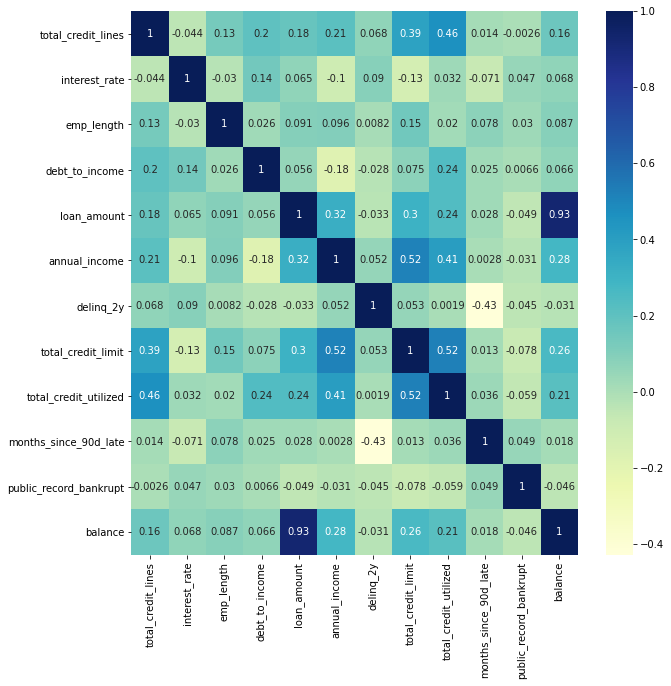

In [62]:
fig,ax = plt.subplots(figsize=(10, 10))   
sns.heatmap(df_corr.corr(), annot=True, cmap="YlGnBu") # the color intensity is based on 
plt.show()

#### Observations:
#### 1. loan_amount has max correlation with the annual income of an individual.
#### 2. Negative correlation is observed betweeen public_record_bankrupcy and the delinq_2y which is suprising.
#### 3. loan_amount has very small correlation with the interest rate which is quite different with the scenario of increase in real estate              market due to low interest rates.
#### 4. total_credit_utilization has good correlation with loan amount.
#### 5. Interest rate and emp_lenth of an indiviual has equal correlation with the loan_amount.

### 4.Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

#### Bin size is calculated using Rice rule:

In [63]:
bin_size= int(((len(df['loan_amount']))**(1/3))*2)
bin_size

43

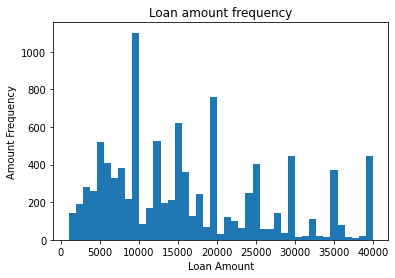

In [64]:
plt.hist(df['loan_amount'],bins=bin_size)
plt.xlabel("Loan Amount")
plt.ylabel("Amount Frequency")
plt.title("Loan amount frequency")
plt.show()

#### After calculating the bin sizes using rice rule, its been observed that the loan amount of 10000 is borrowed by many individuals. 
#### Also smaller amounts are borrowed many times when compared to larger amounts. 
#### Amounts with increments in 5000 are taken most of the times.
#### Very small individuals are in between 35k to 40k category.

### 5. Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 
### Is there a better way to do this than with a lambda? Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 


In [65]:
plains=['MT','WY','CO','KS','NN','TX', 'OK', 'NE','ND','SD']
midwest=['MN','IA','MO','KY','IL', 'IN','MI', 'OH','WI']
pacific=['WA','OR','ID','CA','NV','AZ' ,'UT']
northeast=['WA','VA','PA','DE','MD','NJ','RI','CT','MA','NY','NH','VT','ME']
south=['AR','LA','MS','TN','AL','GA','FL','SC','NC']

In [66]:
#Function to split up states to region
func=(lambda x: "Plains"  if x in plains else ("Midwest" if x in midwest else ("Pacific" if x in pacific else ("South" if x in south else "Northeast"))) )

#### # calling function on the dataframe series to create new column  [Method1]

In [67]:
t1=perf_counter()

df['region']= list(map(func,df['state']))

t2=perf_counter()

tim_lambda=t2-t1                             #To check performance using lambda method to create a function

print(tim_lambda)

0.014365466000000993


#### # calling the above lambda "func" funcation using apply method and checking for performance [Method 2]

In [68]:
s1=perf_counter()

df['reg2']=df['state'].apply(func)

s2=perf_counter()

print(s2-s1)

0.011643826999986118


#### Alternative way with out using lambda function [Method 3]:

In [69]:
def states_region (li):
    if li in plains:
        return ("Plains")
    elif li in midwest:
        return ("Midwest")
    elif li in south:
        return ("Midwest")
    elif li in northeast:
        return ("Northeast")
    else:
        return("South")

In [70]:
a1=perf_counter()

df['reg4']=df['state'].apply(states_region)

a2=perf_counter()

tim_me=a2-a1

print(tim_me)

0.014728663999989067


In [71]:
df.drop(["reg2","reg4"],axis=1,inplace=True)

#### After careful observation, concluded that the almost all three methods are giving same performance results. 
#### But cannot finalize as performace of the function also varies by the method it is called like map or apply.

### 6.Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

In [72]:
# Grouping dataframe by region:

df_t=df.groupby(by=['region'],axis=0,sort=True)

In [73]:
# calling dataframe groups:

df_pacific=df_t.get_group("Pacific")
df_plains= df_t.get_group("Plains")
df_midwest= df_t.get_group("Midwest")
df_northeast= df_t.get_group("Northeast")
df_south= df_t.get_group("South")

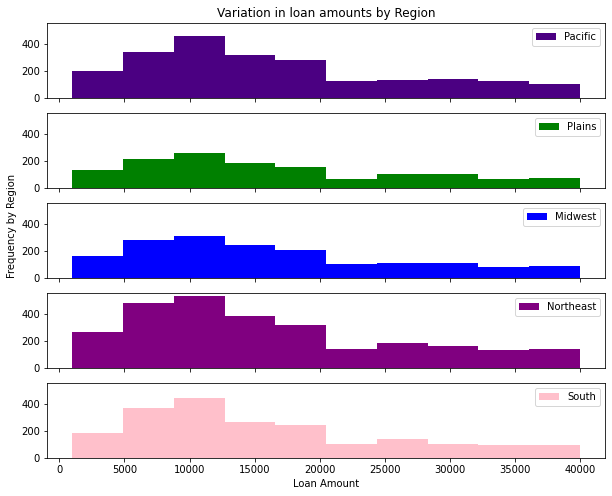

In [74]:
fig,ax=plt.subplots(5,1,figsize=(10,8),sharex=True,sharey=True)
ax[0].hist(df_pacific['loan_amount'],label="Pacific",color="indigo")
ax[1].hist(df_plains['loan_amount'],label="Plains",color="g")
ax[2].hist(df_midwest['loan_amount'],label="Midwest",color="b")
ax[3].hist(df_northeast['loan_amount'],label="Northeast",color="purple")
ax[4].hist(df_south['loan_amount'],label="South",color="pink")
plt.xlabel("Loan Amount")
ax[2].set_ylabel("Frequency by Region",loc='bottom')
ax[0].set_title("Variation in loan amounts by Region")
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
ax[2].legend(loc='upper right')
ax[3].legend(loc='upper right')
ax[4].legend(loc='upper right')
plt.show()

####  Observations:
####  1.  For all the regions loan amount of greater is 20,000 is pretty less.
####  2.  Loan amounts betweeb 10000 to 12500 is higher in northeast, followed by pacific and south regions.
####  3.  Inspite of having fewer states in pacific, the loan amount borrowing is almost equal to other regions.
####  4.  Northeast regions which has highest number of states contributes to more higher borrwing rate at all loan amount categories.
####  5.  Individuals from plains has lower rate on borrowing loans compared to other regions.
####  6.  Almost all the regions are follwing similar trend in borrowing loan amounts.